DE MARCO R, BRUNO R, JAGARLAMUDI V K, et al., 2023. Innovative technique for separating proton core, proton beam, and alpha particles in solar wind 3D velocity distribution functions[J/OL]. Astronomy & Astrophysics, 669: A108. DOI:10.1051/0004-6361/202243719.

In [1]:
import pickle
from astropy import units as u
import spcphys_common_functions as scf
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta

In [2]:
with open('cdf_files/cdf_files_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
v_unit, e_b = scf.vdf_process.generate_vdf_cart_unit(data['SOLO_L2S_SWA-PAS-VDF']['DATE'], data['SOLO_L2S_MAG-RTN']['DATE'], data['SOLO_L2S_MAG-RTN']['B_RTN'] * u.nT)
vdf_vec_t, vdf_value_t = scf.vdf_process.vdf_sph_to_cart(azimuth=data['SOLO_L2S_SWA-PAS-VDF']['Azimuth']*u.deg, elevation=data['SOLO_L2S_SWA-PAS-VDF']['Elevation']*u.deg, energy=data['SOLO_L2S_SWA-PAS-VDF']['Energy']*u.eV, vdf=data['SOLO_L2S_SWA-PAS-VDF']['vdf']*(u.s**3/u.m**6), v_unit_new=v_unit)
pdf_t, v_grid_t = scf.vdf_process.vdf_griddata_t(vdf_vec_t=vdf_vec_t, vdf_value_t=vdf_value_t, grid_size=25, multiprocess=80)

100%|██████████| 204/204 [00:38<00:00,  5.32it/s]


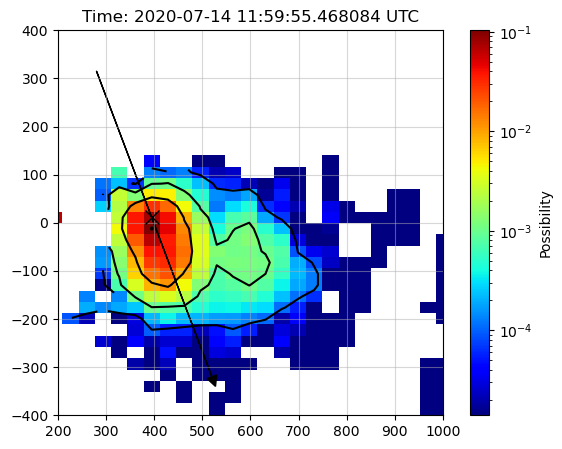

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.set_xlim(200, 1000)
ax.set_ylim(-400, 400)
ax.set_aspect('equal')
ax.set_title('Time: ' + str(data['SOLO_L2S_SWA-PAS-VDF']['DATE'][-2]) + ' UTC')

quadmesh = scf.vdf_process.plot_vdf_2d(axes=ax, pdf=pdf_t[-2], v_grid=v_grid_t[-2], compress_v_unit=2, core_marker=True, imf_vector=e_b[-2], v_unit=v_unit[-2], clip_lower_percentage=0.5)
plt.colorbar(quadmesh, ax=ax, label='Possibility')


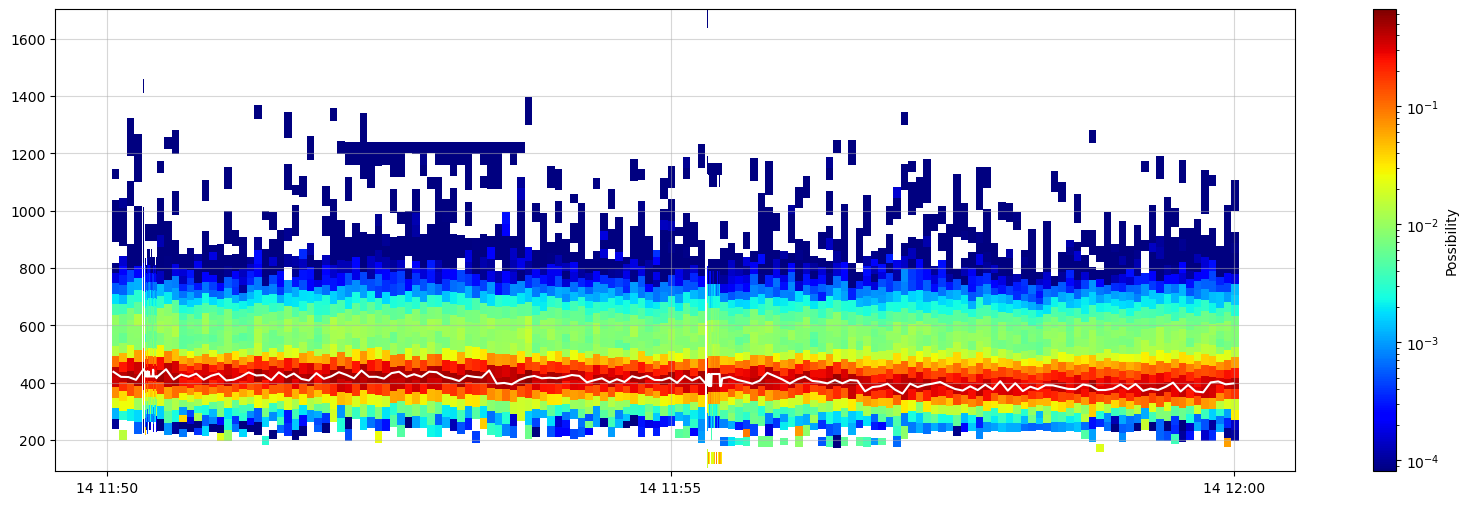

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

quadmesh = scf.vdf_process.plot_vdf_1d_t(axes=ax, time=data['SOLO_L2S_SWA-PAS-VDF']['DATE'], pdf_t=pdf_t, v_grid_t=v_grid_t, target_v_unit=0, core_line={'ls': '-', 'color': 'w'}, clip_lower_percentage=0.5)
plt.colorbar(quadmesh, ax=ax, label='Possibility')